In [1]:
# DSC530-T302
# Stephen Smitshoek
# Week07
# Exercise 10-1

In [2]:
import first
import thinkstats2
import thinkplot
import numpy as np

import brfss

In [3]:
df = brfss.ReadBrfss()
df = df.dropna(subset=['htm3', 'wtkg2'])
heights, weights = df.htm3, df.wtkg2

In [4]:
log_weights = np.log10(weights)

In [5]:
inter, slope = thinkstats2.LeastSquares(heights, log_weights)
print('The least squares intercept is {:.3f}, and the slope is {:.3f}'.format(inter, slope))
print('wtkg2 = 10^(htm3*0.005 + 0.993)')

The least squares intercept is 0.993, and the slope is 0.005
wtkg2 = 10^(htm3*0.005 + 0.993)


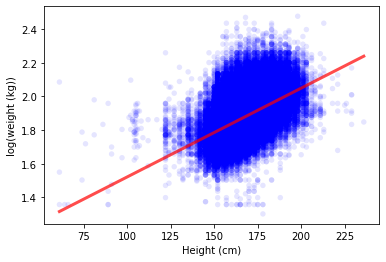

In [6]:
fit_xs, fit_ys = thinkstats2.FitLine(heights, inter, slope)
thinkplot.Scatter(heights, log_weights, alpha=0.1)
thinkplot.Plot(fit_xs, fit_ys, color='red')
thinkplot.Config(xlabel='Height (cm)', ylabel='log(weight (kg))')

In [7]:
res = thinkstats2.Residuals(heights, log_weights, inter, slope)
df['residuals'] = res
bins = np.arange(130, 210, 5)
indices = np.digitize(df.htm3, bins)
groups = df.groupby(indices)
gr_heights = [group.htm3.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.residuals) for i, group in groups]

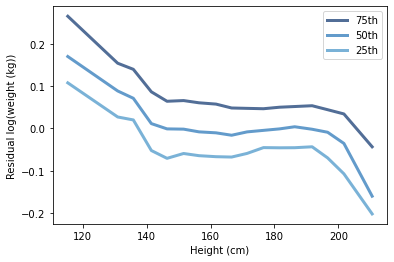

In [8]:
for percent in [75, 50, 25]:
    residuals = [cdf.Percentile(percent) for cdf in cdfs]
    label = '{}th'.format(percent)
    thinkplot.Plot(gr_heights, residuals, label=label)
    
thinkplot.Config(xlabel='Height (cm)', ylabel='Residual log(weight (kg))')

In [9]:
unweighted_hts = []
for _ in range(100):
    unweighted_hts.append(thinkstats2.ResampleRows(df).htm3.mean())

mean = thinkstats2.Mean(unweighted_hts)
stderr = thinkstats2.Std(unweighted_hts)
cdf = thinkstats2.Cdf(unweighted_hts)
ci = cdf.ConfidenceInterval(90)

In [10]:
print('Resampling Without Weights')
print('Mean: {:.2f}'.format(mean))
print('Std Error: {:.2f}'.format(stderr))
print('90% Confidence Interval: {:.2f} to {:.2f}'.format(ci[0], ci[1]))

Resampling Without Weights
Mean: 168.96
Std Error: 0.02
90% Confidence Interval: 168.93 to 168.99


In [11]:
weighted_hts = []
for _ in range(100):
    weighted_hts.append(thinkstats2.ResampleRowsWeighted(df, 'finalwt').htm3.mean())
    
mean = thinkstats2.Mean(weighted_hts)
stderr = thinkstats2.Std(weighted_hts)
cdf = thinkstats2.Cdf(weighted_hts)
ci = cdf.ConfidenceInterval(90)

In [12]:
print('Resampling With Weights')
print('Mean: {:.2f}'.format(mean))
print('Std Error: {:.2f}'.format(stderr))
print('90% Confidence Interval: {:.2f} to {:.2f}'.format(ci[0], ci[1]))

Resampling With Weights
Mean: 170.50
Std Error: 0.02
90% Confidence Interval: 170.47 to 170.53
